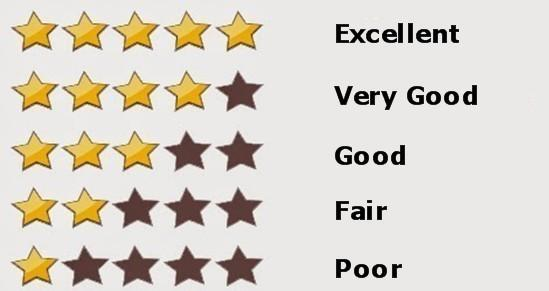 

## RATING PREDICTION:

We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) as well with the review. 
The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don’t have a rating. So, we have to build an application which can predict the rating  by seeing the review.

You need to build a machine learning model. Before model building do all data preprocessing steps involving NLP. Try different models with different hyper parameters and select the best model. Follow the complete life cycle of data science. Include all the steps like
1. Data Cleaning
2. Exploratory Data Analysis
3. Data Preprocessing
4. Model Building
5. Model Evaluation
6. Selecting the best model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#packages from nltk
import nltk
import re
import string
import missingno
from nltk.corpus import stopwords
from nltk import pos_tag
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import FreqDist

# packages from gensim
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from scipy import stats
from scipy.stats import zscore
from scipy.sparse import hstack
import scikitplot as skplt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from collections import Counter
lemmatizer = nltk.stem.WordNetLemmatizer()

import warnings 
warnings.filterwarnings('ignore')

import sklearn

# Importing useful libraries for model training
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

# Ensemble Techniques.
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Model selection libraries.
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import GridSearchCV

# Importing some metrics we can use to evaluate our model performance. 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

In [53]:
df=pd.read_csv("Rating.csv")

In [54]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
df

,Unnamed: 0,Review_title,Review_text,Ratings
0,0,Fabulous!,After one month of usage for office work and m...,5
1,1,Worth every penny,Laptop is worth the price. It is fast and smoo...,5
2,2,Great product,I got it for 54k\nFor this price\nBuild Qualit...,5
3,3,Great product,One of the best laptop in given prize segment....,5
4,4,Awesome,Value for money just go for it✨,5
...,...,...,...,...
21439,21439,Brilliant,Very nice,5
21440,21440,Excellent,Excellent Resolution\nGood working\nVery very ...,5
21441,21441,Brilliant,Really good monitor. Very effective and useful...,5
21442,21442,Good choice,Actually its not a 24 inch display its just 21...,4


In [55]:
#DataSet Information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21444 entries, 0 to 21443
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    21444 non-null  int64 
 1   Review_title  21444 non-null  object
 2   Review_text   21444 non-null  object
 3   Ratings       21444 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 670.2+ KB


In [56]:
df.shape

(21444, 4)

In [57]:
df.isnull().sum()

Unnamed: 0      0
Review_title    0
Review_text     0
Ratings         0
dtype: int64

<AxesSubplot:>

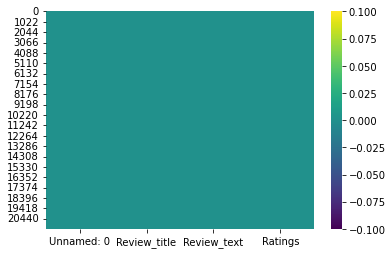

In [58]:
sns.heatmap(df.isnull(),cmap='viridis')

### Dropping the columns:

In [59]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [60]:
print("We have {} Rows and {} Columns in our dataframe".format(df.shape[0], df.shape[1]))
df.head(20)

We have 21444 Rows and 3 Columns in our dataframe


,Review_title,Review_text,Ratings
0,Fabulous!,After one month of usage for office work and m...,5
1,Worth every penny,Laptop is worth the price. It is fast and smoo...,5
2,Great product,I got it for 54k\nFor this price\nBuild Qualit...,5
3,Great product,One of the best laptop in given prize segment....,5
4,Awesome,Value for money just go for it✨,5
5,Good quality product,Nice and I love it good laptop with simple design,4
6,Wonderful,It's good product but some times it gets stuck...,4
7,Classy product,Very nice product...must go for it.. 👍👍👍👍,5
8,Value-for-money,Best laptop just go 4 it ... Just one thing ba...,4
9,Great product,good,5


In [61]:
df.columns

Index(['Review_title', 'Review_text', 'Ratings'], dtype='object')

##### Let's find out the unique values in the column now :

In [62]:
df.nunique()

Review_title     194
Review_text     7327
Ratings            5
dtype: int64

In [63]:
df['Ratings'].value_counts()

5    13352
4     4229
1     2122
3     1250
2      491
Name: Ratings, dtype: int64

In [64]:
df['Review_title'].value_counts()

Wonderful                                      1090
Great product                                   848
Perfect product!                                803
Just wow!                                       800
Mind-blowing purchase                           788
                                               ... 
Dell S2240L users.....DONT BUY this monitor       1
Product is up to the mark!!                       1
Perfect product!Excellent color quality           1
best in market                                    1
Best gaming monitor                               1
Name: Review_title, Length: 194, dtype: int64

In [65]:
df['Review_text'].value_counts()

Good                                                                                                                                   425
Nice                                                                                                                                   229
Nice product                                                                                                                           188
Good product                                                                                                                           176
Very nice product                                                                                                                      103
                                                                                                                                      ... 
Worst battery                                                                                                                            1
Best product this price per

In [66]:
# Now combining the "Review_title" and "Review_text" columns into one single column called "Review"
df['Review'] = df['Review_title'].map(str)+' '+df['Review_text']
df

,Review_title,Review_text,Ratings,Review
0,Fabulous!,After one month of usage for office work and m...,5,Fabulous! After one month of usage for office ...
1,Worth every penny,Laptop is worth the price. It is fast and smoo...,5,Worth every penny Laptop is worth the price. I...
2,Great product,I got it for 54k\nFor this price\nBuild Qualit...,5,Great product I got it for 54k\nFor this price...
3,Great product,One of the best laptop in given prize segment....,5,Great product One of the best laptop in given ...
4,Awesome,Value for money just go for it✨,5,Awesome Value for money just go for it✨
...,...,...,...,...
21439,Brilliant,Very nice,5,Brilliant Very nice
21440,Excellent,Excellent Resolution\nGood working\nVery very ...,5,Excellent Excellent Resolution\nGood working\n...
21441,Brilliant,Really good monitor. Very effective and useful...,5,Brilliant Really good monitor. Very effective ...
21442,Good choice,Actually its not a 24 inch display its just 21...,4,Good choice Actually its not a 24 inch display...


## Data Cleaning

In [67]:
# Return the wordnet object value corresponding to the POS tag
#Part-Of-Speech (POS) tagging: assign a tag to every word to define if it corresponds to a noun, a verb etc. using the WordNet lexical database

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [68]:
def clean_text(text):
    # lower text
    text = text.lower()
    text = re.sub("[^\w\s]", " ", text) 
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    #Remove leading and trailing whitespace
    #text=re.sub("[^\s+|\s+?$]"," ",text)
    # remove stop words
    stop = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    #text=stemmer.stem(text)
    # remove words with only two letter
    text = [t for t in text if len(t) > 2]
    # join all
    text = " ".join(text)
    return(text)

In [69]:
# cleaning the reviews and storing them in a separate feature...
df["Clean_Review"] = df["Review"].apply(lambda x: clean_text(x))

In [70]:
# Creating column for word counts in the review text
df['Clean_Review_WC'] = df['Clean_Review'].apply(lambda x: len(str(x).split(' ')))
df[['Clean_Review_WC', 'Clean_Review']].head(10)

,Clean_Review_WC,Clean_Review
0,39,fabulous one month usage office work multimedi...
1,19,worth every penny laptop worth price fast smoo...
2,38,great product get price\nbuild quality build s...
3,16,great product one best laptop give prize segme...
4,3,awesome value money
5,9,good quality product nice love good laptop sim...
6,7,wonderful good product time get stuck good
7,5,classy product nice product must
8,14,value money best laptop one thing battery give...
9,3,great product good


In [71]:
# Creating column for character counts in the review text
df['Clean_Review_CC'] = df['Clean_Review'].str.len()
df[['Clean_Review_CC','Clean_Review']].head(10)

,Clean_Review_CC,Clean_Review
0,242,fabulous one month usage office work multimedi...
1,122,worth every penny laptop worth price fast smoo...
2,284,great product get price\nbuild quality build s...
3,108,great product one best laptop give prize segme...
4,19,awesome value money
5,56,good quality product nice love good laptop sim...
6,42,wonderful good product time get stuck good
7,32,classy product nice product must
8,84,value money best laptop one thing battery give...
9,18,great product good


## EDA

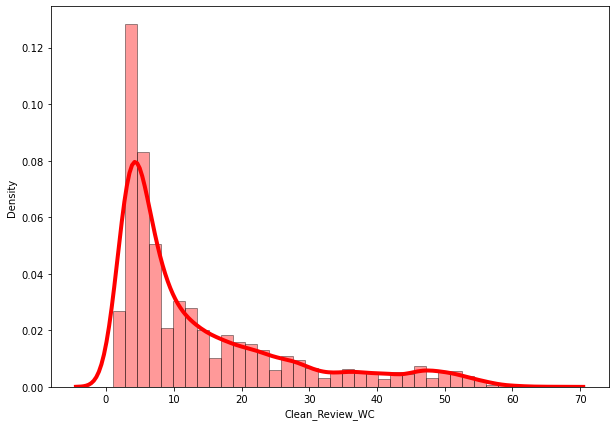

In [72]:
# Density plot and histogram of all word count
plt.figure(figsize=(10,7))
sns.distplot(df['Clean_Review_WC'], hist = True, kde = True,
            bins = int(180/5), color = 'red',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

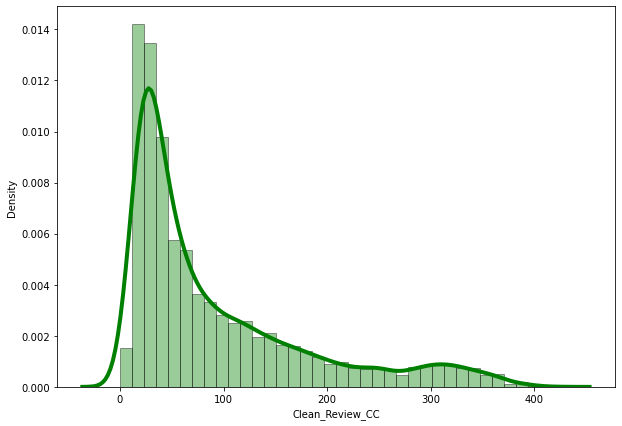

In [73]:
# Density plot and histogram of all character count
plt.figure(figsize=(10,7))
sns.distplot(df['Clean_Review_CC'], hist = True, kde = True,
            bins = int(180/5), color = 'green',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

## Removing Outliers

In [74]:
# Applying zscore to remove outliers
z_score = zscore(df[['Clean_Review_WC']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
print("We have {} Rows and {} Columns in our dataframe after removing outliers".format(df.shape[0], df.shape[1]))

We have 21220 Rows and 7 Columns in our dataframe after removing outliers


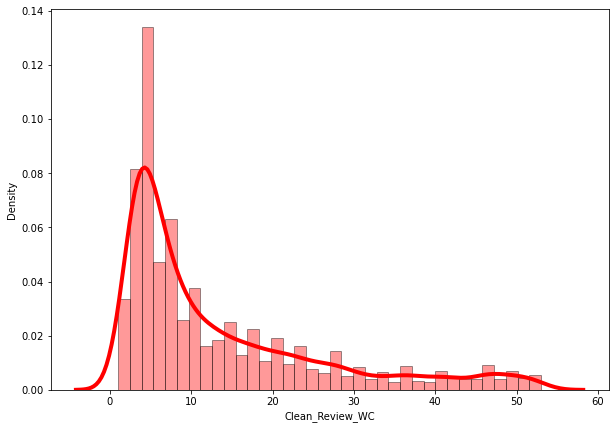

In [75]:
# Density plot and histogram of all word count after outliers removal
plt.figure(figsize=(10,7))
sns.distplot(df['Clean_Review_WC'], hist = True, kde = True,
            bins = int(180/5), color = 'red',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

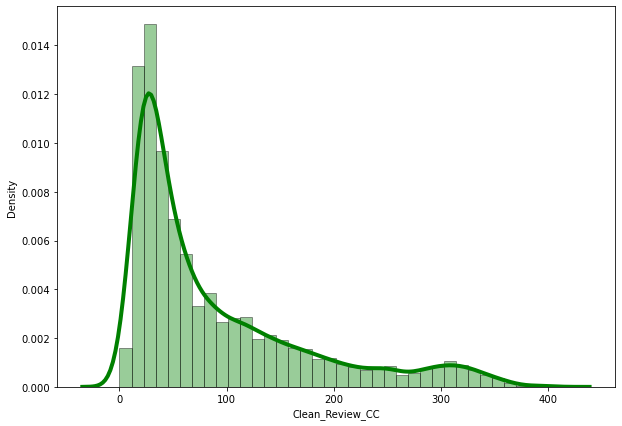

In [76]:
# Density plot and histogram of all character count after outliers removal
plt.figure(figsize=(10,7))
sns.distplot(df['Clean_Review_CC'], hist = True, kde = True,
            bins = int(180/5), color = 'green',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

5    13224
4     4167
1     2112
3     1233
2      484
Name: Ratings, dtype: int64


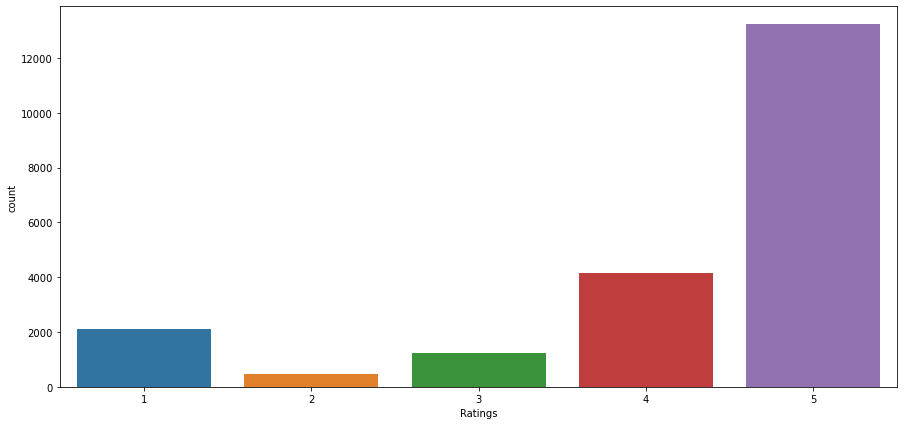

In [77]:
# Checking the count of target column values
plt.figure(figsize=(15,7))
sns.countplot(df['Ratings'])
print(df.Ratings.value_counts())
plt.show()

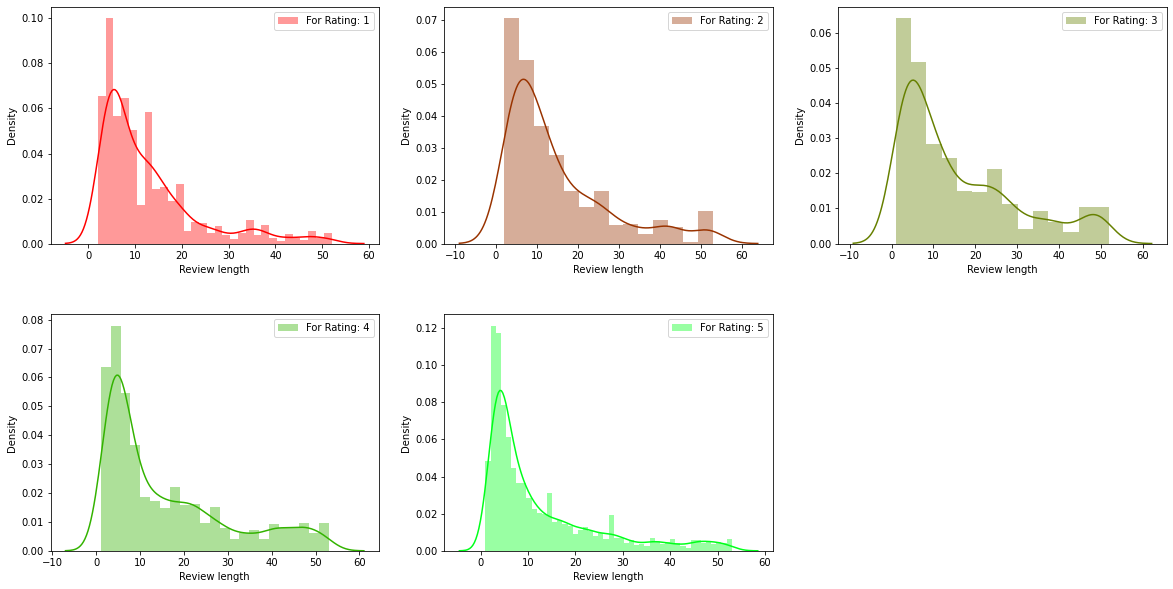

In [78]:
# Checking review word count distribution for each rating
ratings = np.sort(df.Ratings.unique())
cols = 3
rows = len(ratings)//cols
if rows % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
p = 1
colors = [(1,0,0,1),(0.6,0.2,0,1),(0.4,0.5,0,1),(0.2,0.7,0,1),(0,1,0.1,1)]
for i in ratings:
    axis = fig.add_subplot(rows,cols,p)
    sns.distplot(df.Clean_Review_WC[df.Ratings==i], ax=axis, label=f"For Rating: {i}", color=colors[i-1])
    axis.set_xlabel(f"Review length")
    axis.legend()
    p += 1
    
plt.show()

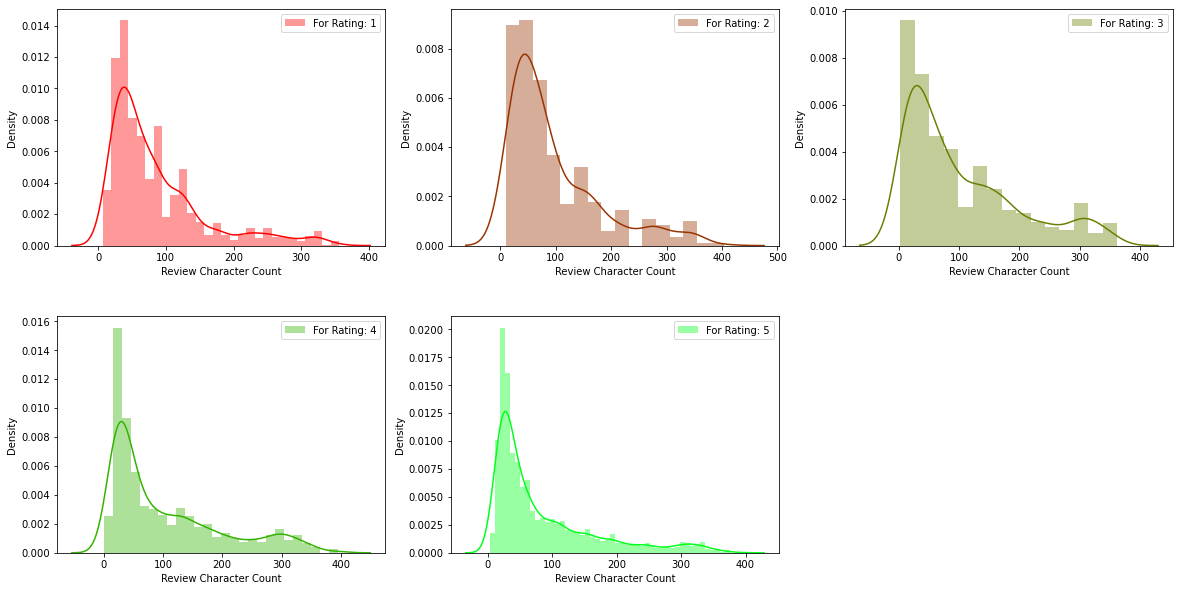

In [79]:
# Checking review character count distribution for each rating
ratings = np.sort(df.Ratings.unique())
cols = 3
rows = len(ratings)//cols
if rows % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
p = 1
colors = [(1,0,0,1),(0.6,0.2,0,1),(0.4,0.5,0,1),(0.2,0.7,0,1),(0,1,0.1,1)]
for i in ratings:
    axis = fig.add_subplot(rows,cols,p)
    sns.distplot(df.Clean_Review_CC[df.Ratings==i], ax=axis, label=f"For Rating: {i}", color=colors[i-1])
    axis.set_xlabel(f"Review Character Count")
    axis.legend()
    p += 1
    
plt.show()

## BUILD WORD DICTIONARY

In [80]:
# Tokenizing Documents
data=[]
from nltk.tokenize import word_tokenize
for j,i in enumerate(df['Clean_Review']):
    a=word_tokenize(i,'english')
    data.append(a)

In [81]:
# Making Word dictionary...
dictionary = corpora.Dictionary(data)
print(dictionary)

Dictionary<5282 unique tokens: ['available', 'average', 'back', 'backlit', 'boot']...>


# BUILD WORD CLOUD

In [82]:
# Making a wordcloud function in order to show the ratings from the dataset..
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def Display_wordcloud(data,title):
    feedbackcloud = WordCloud(
        background_color = 'white',
        max_words = 1000,
        max_font_size = 40, 
        scale = 3,
        random_state = 25
    ).generate(str(data))

    fig = plt.figure(1, figsize = (15, 10),facecolor='r')
    plt.axis('off')
    plt.imshow(feedbackcloud)
    plt.title(f"{title} Ratings")
    plt.show()

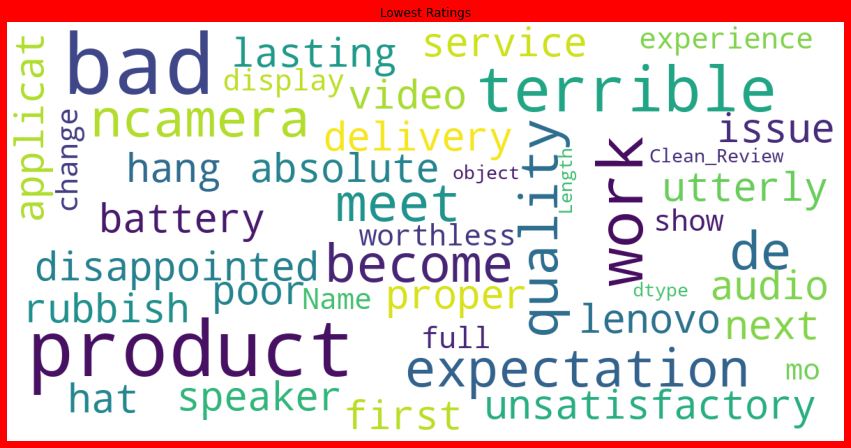

In [83]:
# word cloud for lowest rating
Display_wordcloud(df['Clean_Review'][df['Ratings']==1],"Lowest")

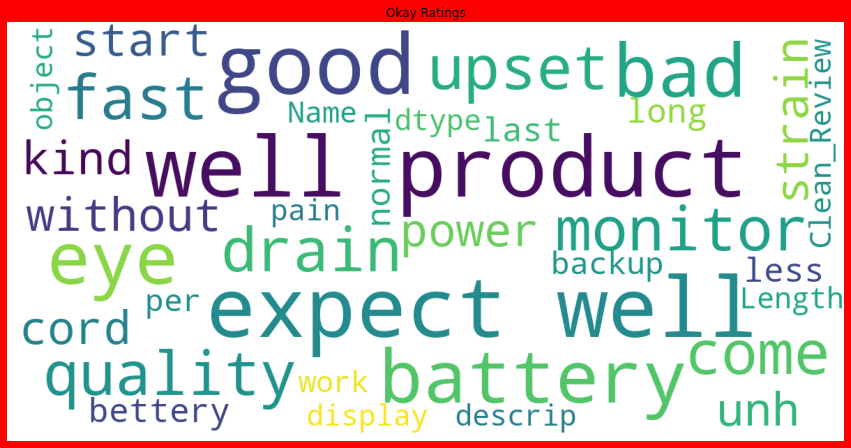

In [84]:
# word cloud for 2nd lowest rating
Display_wordcloud(df['Clean_Review'][df['Ratings']==2],"Okay")

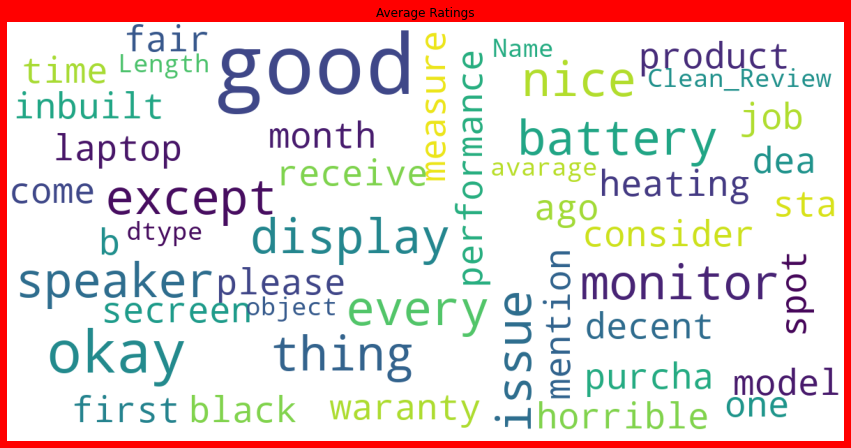

In [85]:
# word cloud for average rating
Display_wordcloud(df['Clean_Review'][df['Ratings']==3],"Average")

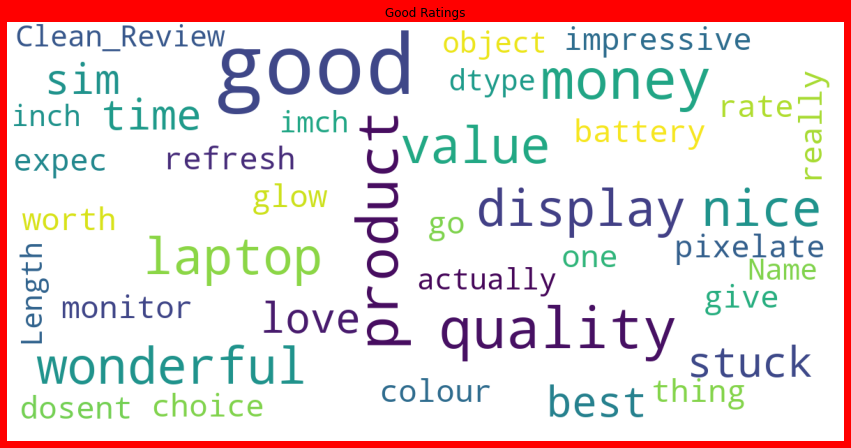

In [86]:
# word cloud for good rating
Display_wordcloud(df['Clean_Review'][df['Ratings']==4],"Good")

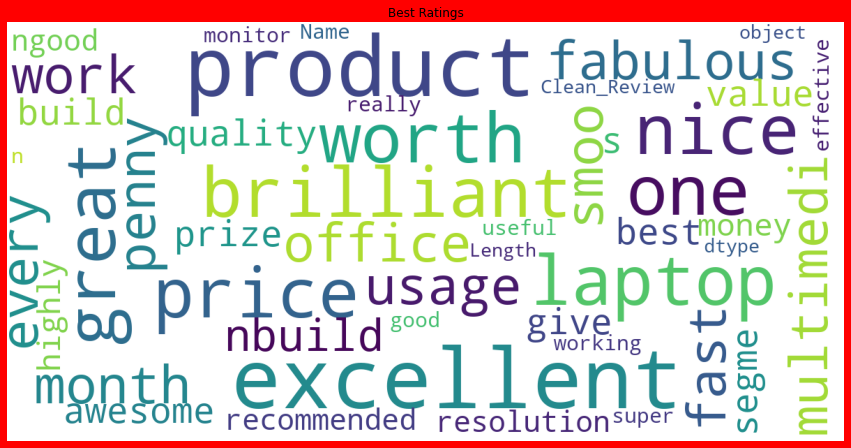

In [87]:
# word cloud for good rating
Display_wordcloud(df['Clean_Review'][df['Ratings']==5],"Best")

# Feature Extraction

In [88]:
# creating the TF-IDF(term frequency–inverse document frequency) vectorizer function in order to convert the tokens 
#   from the train documents into vectors so that machine can do further processing
def Tf_idf_train(text):
    tfid = TfidfVectorizer(min_df=3,smooth_idf=False)
    return tfid.fit_transform(text)

In [89]:
# Inserting vectorized values in a variable x, which will be used in training the model 
x=Tf_idf_train(df['Clean_Review'])

# checking the shape of the data which is inserted in x which will be used for model training.
print("Shape of x: ",x.shape)

Shape of x:  (21220, 3573)


In [90]:
# Assigning the label in y and checking it's shape
y = df['Ratings'].values
print("Shape of y: ",y.shape)

Shape of y:  (21220,)


# MODEL TRAINING

In [91]:
# Defining the Classification Machine Learning Algorithms
LR = LogisticRegression(solver='lbfgs')
SVC = LinearSVC()
BNB = BernoulliNB()
MNB=MultinomialNB()
DTC=DecisionTreeClassifier()
RFC=RandomForestClassifier()
BGC=BaggingClassifier()
ETC=ExtraTreesClassifier()
SGD = SGDClassifier()

In [92]:
#Putting machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('Logistic Regression()',LR))
models.append(('Linear SVC()',SVC))
models.append(('BernoulliNB()',BNB))
models.append(('MultinomialNB()',MNB))
models.append(('DecisionTreeClassifier',DTC))
models.append(('RandomForestClassifier',RFC))
models.append(('BaggingClassifier',BGC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('SGDClassifier()',SGD))

In [93]:
#Function which will find best Random State and then calculate Maximum Accuracy Score corresponding to it and print accuracy score in one go.
def max_acc_score(clf,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=r_state,stratify=y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state

In [50]:
#Lists to store model name, Learning score, Accuracy score, cross_val_score, Auc Roc score .
Model=[]
Score=[]
Acc_score=[]
CVScore=[]

#For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print('-----------------------',name,'----------------------------')
    Model.append(name)
    print(model)
#Now here I am calling a function which will calculate the max accuracy score for each model and return best random state.
    r_state=max_acc_score(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=r_state,stratify=y)
    model.fit(x_train,y_train)
#Learning Score
    score=model.score(x_train,y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100) 
#Final CV Score    
    cv_score=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross Val Score : ', cv_score)
    CVScore.append(cv_score*100)
#Classification report      
    print('Classification Report:\n',classification_report(y_test,y_pred))  
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')

----------------------- Logistic Regression() ----------------------------
LogisticRegression()
Max Accuracy Score corresponding to Random State  50 is: 0.9447062519635564


Learning Score :  0.9556348458327724
Accuracy Score :  0.9447062519635564
Cross Val Score :  0.9252591894439209
Classification Report:
               precision    recall  f1-score   support

           1       0.97      0.98      0.98       634
           2       0.99      0.76      0.86       145
           3       0.96      0.80      0.87       370
           4       0.92      0.85      0.88      1250
           5       0.95      0.99      0.97      3967

    accuracy                           0.94      6366
   macro avg       0.96      0.88      0.91      6366
weighted avg       0.94      0.94      0.94      6366

Confusion Matrix:
 [[ 622    0    0    3    9]
 [  12  110    5    7   11]
 [   2    1  296   41   30]
 [   2    0    5 1065  178]
 [   0    0    3   43 3921]]


----------------------- Linear SVC() --

In [99]:
#Making a Dataframe comprises of Differnt Calculated Scores :
result=pd.DataFrame({'Model': Model,'Learning Score': Score,'Accuracy Score': Acc_score,'Cross Val Score':CVScore,}) 
result

,Model,Learning Score,Accuracy Score,Cross Val Score
0,Logistic Regression(),95.563485,94.470625,92.525919
1,Linear SVC(),97.549482,95.915803,93.119698
2,BernoulliNB(),83.930254,81.950990,79.095193
3,MultinomialNB(),83.795611,83.443292,81.456173
4,DecisionTreeClassifier,99.400835,96.025762,91.606975
5,RandomForestClassifier,99.407567,97.282438,94.443921
6,BaggingClassifier,99.185405,96.135721,92.049953
7,ExtraTreesClassifier,99.400835,96.764059,93.638077
8,SGDClassifier(),96.203043,94.784794,92.441093


<AxesSubplot:>

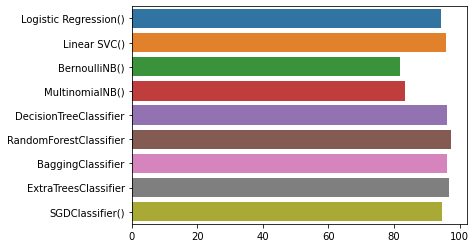

In [95]:
#visualisation of Accuracy Score
sns.barplot(y=Model,x=Acc_score)

# Hyperparameter tuning using GridSearchCV

In [67]:
#Performing Hyperparameter tuning on RandomForestClassifier

rfc=RandomForestClassifier()
parameters={'n_estimators':[100,300,500],'max_depth':[15, 25, 30],'min_samples_leaf': [1,3,5], 'min_samples_split': [1,5,8]}
clf=GridSearchCV(rfc,parameters,cv=5)
clf.fit(x_train,y_train)
clf.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [69]:
#Applying the parameters we got after hyper parameter tuning
rfc=RandomForestClassifier(n_estimators=100,max_depth=30,min_samples_leaf=1, min_samples_split=5)
rfc.fit(x_train,y_train)
predrf=rfc.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8572101790763431
[[ 560    0    1    0   73]
 [  12   59    0    1   73]
 [   5    0  160    4  201]
 [   4    0    0  712  534]
 [   0    0    0    1 3966]]
              precision    recall  f1-score   support

           1       0.96      0.88      0.92       634
           2       1.00      0.41      0.58       145
           3       0.99      0.43      0.60       370
           4       0.99      0.57      0.72      1250
           5       0.82      1.00      0.90      3967

    accuracy                           0.86      6366
   macro avg       0.95      0.66      0.75      6366
weighted avg       0.88      0.86      0.84      6366



In [70]:
#Performing Hyperparameter tuning on ExtraTreesClassifier
etc=ExtraTreesClassifier()
parameters={'n_estimators':[100,300,500,800],'max_depth':[3, 5, 8, 15],'max_features':['sqrt','log2'],
            'class_weight':['balanced','balanced_subsample']}
clf=GridSearchCV(etc,parameters,cv=5)
clf.fit(x_train,y_train)
clf.best_params_

{'class_weight': 'balanced_subsample',
 'max_depth': 15,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [83]:
#Applying the parameters we got after hyper parameter tuning
etc=ExtraTreesClassifier(n_estimators=500,max_depth=15,max_features='sqrt',class_weight='balanced_subsample')
etc.fit(x_train,y_train)
predetc=etc.predict(x_test)
print(accuracy_score(y_test,predetc))
print(confusion_matrix(y_test,predetc))
print(classification_report(y_test,predetc))

0.9359095193213949
[[ 629    1    1    0    3]
 [  10  128    5    2    0]
 [   5    6  327   29    3]
 [  12    9   27 1125   77]
 [   5   10   13  190 3749]]
              precision    recall  f1-score   support

           1       0.95      0.99      0.97       634
           2       0.83      0.88      0.86       145
           3       0.88      0.88      0.88       370
           4       0.84      0.90      0.87      1250
           5       0.98      0.95      0.96      3967

    accuracy                           0.94      6366
   macro avg       0.89      0.92      0.91      6366
weighted avg       0.94      0.94      0.94      6366



In [100]:
#Performing Hyperparameter tuning on SGDClassifier
sgd=SGDClassifier()
parameters={'loss':['log_loss','hinge','log','modified_huber','squared_hinge','perceptron','squared_error',
                    'epsilon_insensitive', 'huber','squared_epsilon_insensitive'], 'penalty':['l2','l1','elasticnet'],
            'alpha': [0.0001,0.001,0.01,0.1], 'fit_intercept': [True,False]}
clf=GridSearchCV(sgd,parameters,cv=5)
clf.fit(x_train,y_train)
clf.best_params_

{'alpha': 0.0001,
 'fit_intercept': False,
 'loss': 'modified_huber',
 'penalty': 'elasticnet'}

In [101]:
#Applying the parameters we got after hyper parameter tuning
sgd=SGDClassifier(loss='modified_huber',alpha=0.0001,fit_intercept=False, penalty='elasticnet')
sgd.fit(x_train,y_train)
predsgd=sgd.predict(x_test)
print(accuracy_score(y_test,predsgd))
print(confusion_matrix(y_test,predsgd))
print(classification_report(y_test,predsgd))

0.9544454916745209
[[ 630    0    2    1    1]
 [   4  127    6    8    0]
 [   4    0  324   29   13]
 [   2    1    8 1100  139]
 [   0    1    7   64 3895]]
              precision    recall  f1-score   support

           1       0.98      0.99      0.99       634
           2       0.98      0.88      0.93       145
           3       0.93      0.88      0.90       370
           4       0.92      0.88      0.90      1250
           5       0.96      0.98      0.97      3967

    accuracy                           0.95      6366
   macro avg       0.96      0.92      0.94      6366
weighted avg       0.95      0.95      0.95      6366



# Final Model

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

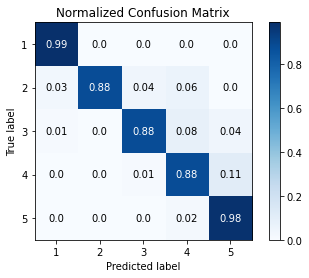

In [102]:
# Creating a normalized confusion matrix for SGDClassifier
skplt.metrics.plot_confusion_matrix(y_test, predsgd, normalize=True)

## Saving the best model

In [103]:
import joblib
joblib.dump(sgd, "Rating_Prediction.pkl")

['Rating_Prediction.pkl']

## Loading the model

In [104]:
Model = joblib.load("Rating_Prediction.pkl")

In [107]:
a = np.array(y_test)
predicted = np.array(Model.predict(x_test))
df_final = pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_final

,Original,Predicted
0,1,1
1,5,5
2,5,5
3,5,5
4,2,2
...,...,...
6361,5,5
6362,5,5
6363,3,3
6364,5,5


## The model with the algorithm SGD classifier after hypertuning the parameters works with 95% accuracy!

# Thank you!